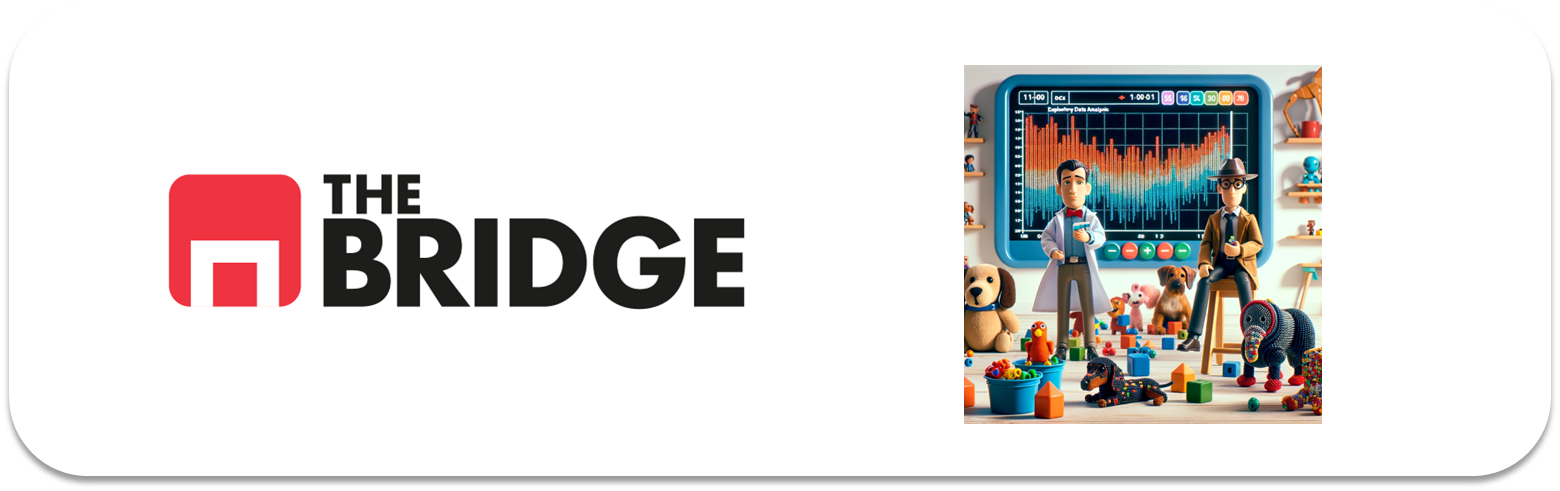

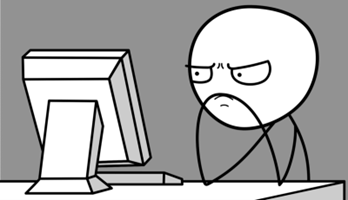

Para ejercitarte y afianzar lo aprendido sobre análisis multivariante, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot


### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [2]:
df_admission = pd.read_csv("./data/admission_data.csv")
df_admission.drop(columns = "Unnamed: 0",inplace=True)

In [3]:
df_admission.head()

,Year,Major,Gender,Admission
0,1973,School of Medicine,F,Rejected
1,1973,Department of Economics,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected


In [4]:
df_admission.dtypes

Year          int64
Major        object
Gender       object
Admission    object
dtype: object

### Ejercicio 2

Realiza los análisis multivariante que consideres necesarios para contestar apoyándote en los datos a las preguntas: ¿Existe algún departamenteo específico donde pudieramos hablar de discriminación?¿Están estos resultados en consonancia con lo obtenido en el análisis bivariante de admisiones y género? 

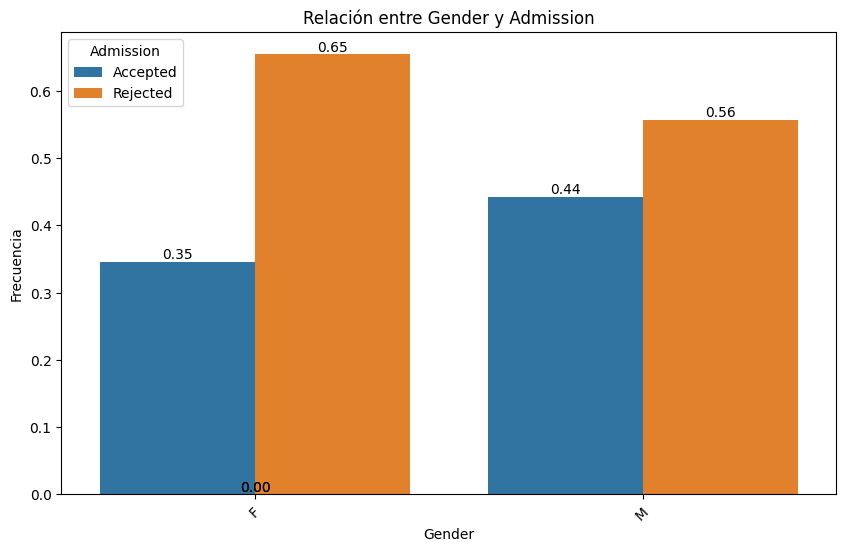

In [5]:
plot_categorical_relationship_fin(df_admission,"Gender","Admission",relative_freq=True,show_values=True)

In [6]:
col_directora = "Major"
col_1 = "Admission"
col_2 = "Gender"
diccionario_multivariante = {}
for valor in df_admission[col_directora].unique():
    diccionario_multivariante[valor] = df_admission.loc[df_admission[col_directora] == valor,[col_2,col_1]]

Respuesta School of Medicine:


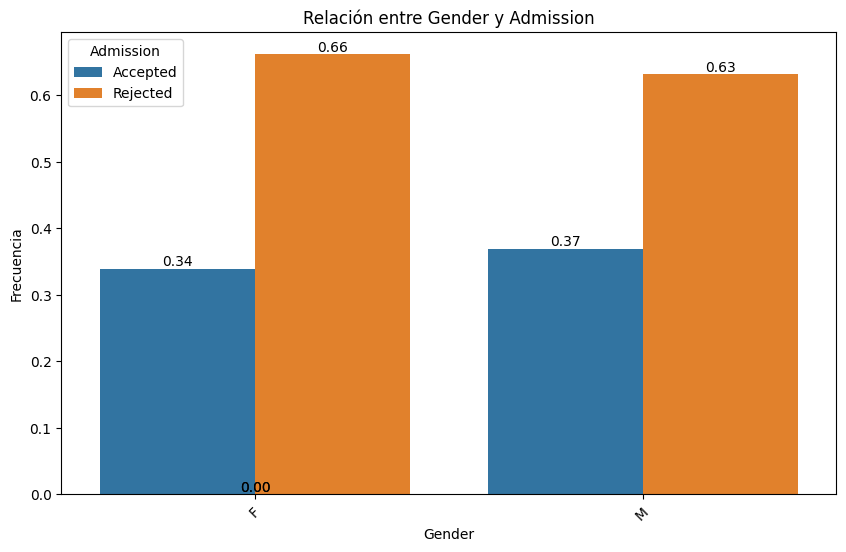

Respuesta Department of Economics:


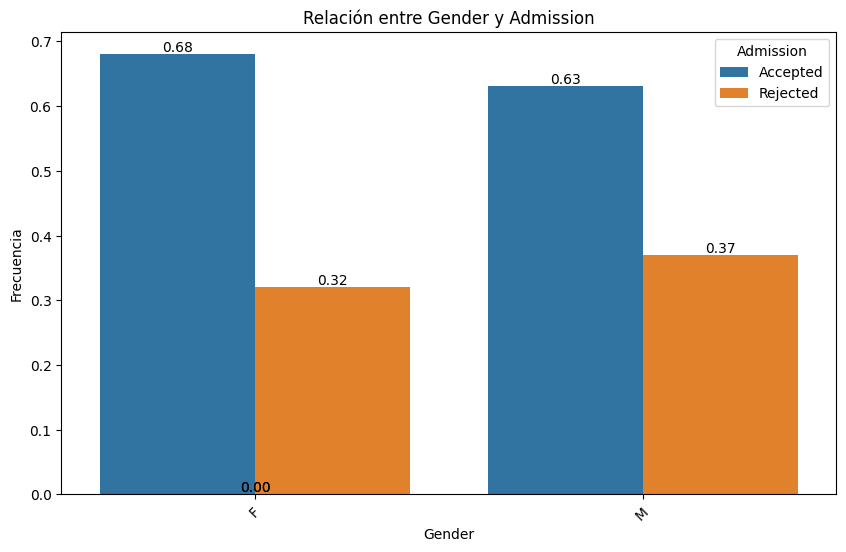

Respuesta Other:


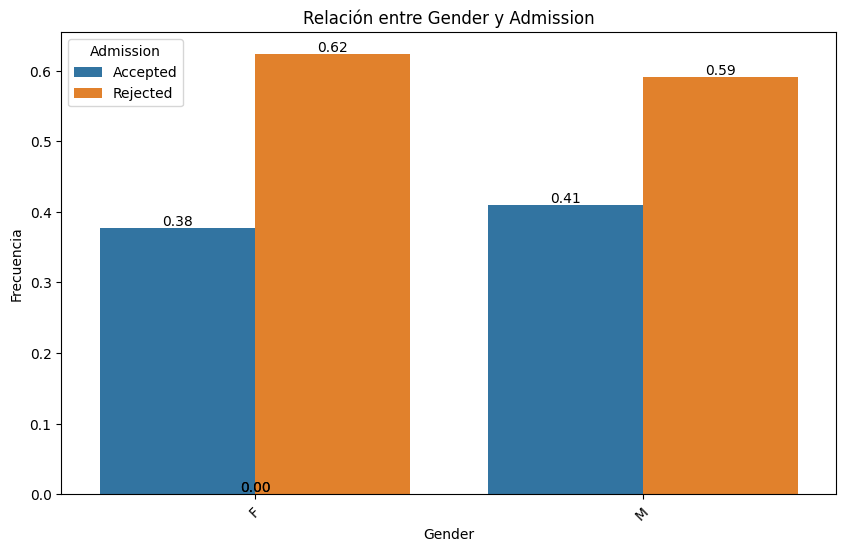

Respuesta Department of Psychology:


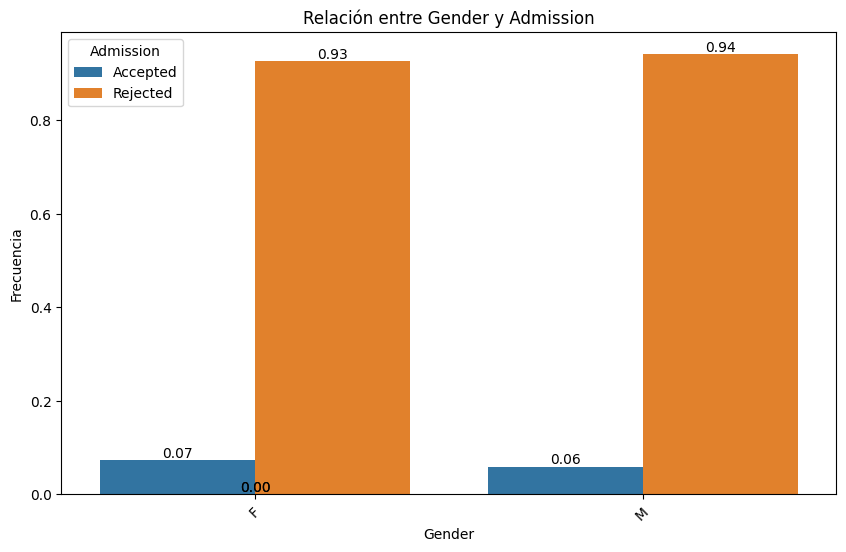

Respuesta Department of Physics and Astronomy:


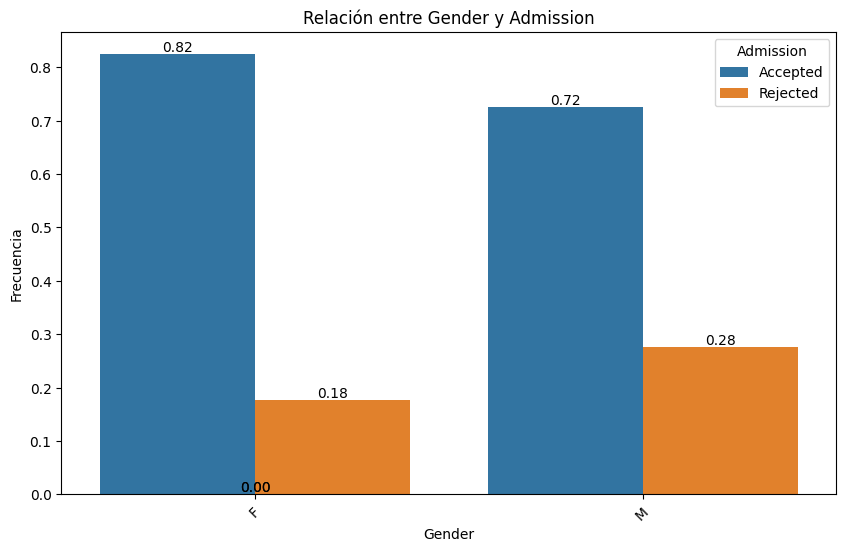

Respuesta Department of Mechanical Engineering:


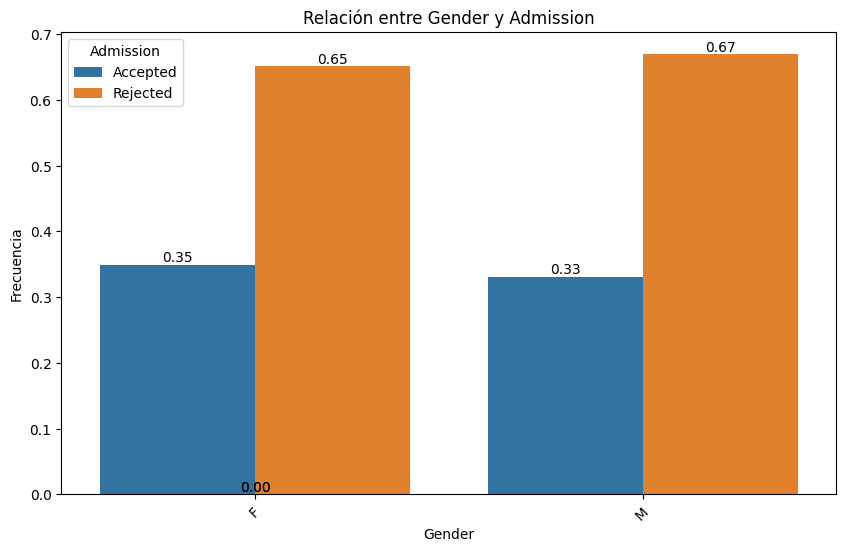

Respuesta School of Political Science and International Relations:


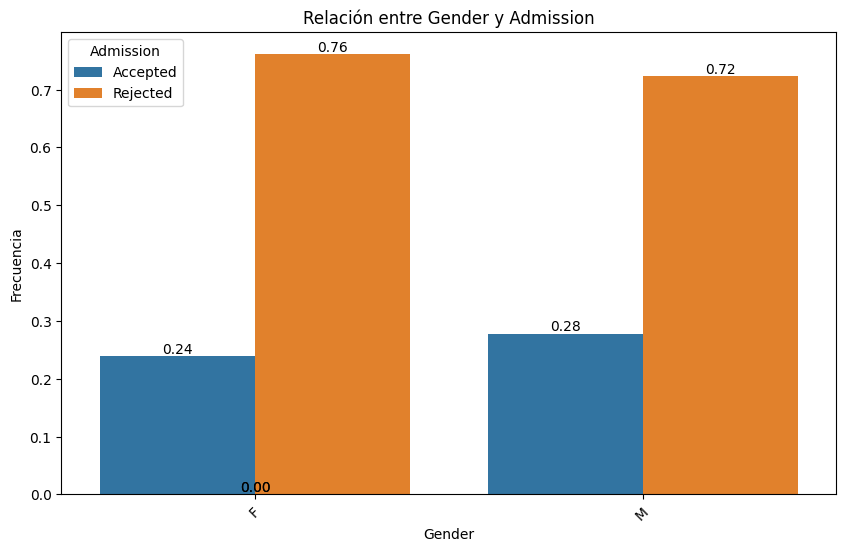

In [7]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)

I don´t believe that any particular department demonstrates discrimination. There are some departments that accept more woman then men and reject more women than men, this could simply show that more women applied to that department. In all the departments, it appears that the numbers of women and men accepted or rejected is quite even. There is no distinct difference.

### Ejercicio 3

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

### Ejercicio 4

Carga el dataset de accidentes que conoces de la unidad anterior y que se encuentra en la ruta "./data/car_crashes.csv", deshazte de las columnas innecesarias y renombra la que contiene las iniciales de los estados a "state"

In [8]:
df_cars = pd.read_csv("./data/car_crashes.csv", sep = "|")
df_cars.drop(columns = "Unnamed: 0",inplace = True)


In [11]:
df_cars.rename(columns={"abbrev":"state"},inplace = True)

In [14]:
df_cars.head(2)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK


### Ejercicio 5

Realiza una análisis de todas las posibles correlaciones dos a dos, de forma numérica primero y luego empleado un heatmap y un pairplot de seaborn. ¿Qué variables tienen o aparentemente tienen una mayor correlación con "total?

In [15]:
corr_matrix = df_cars.corr(numeric_only= True)
corr_matrix

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


(7, 2)


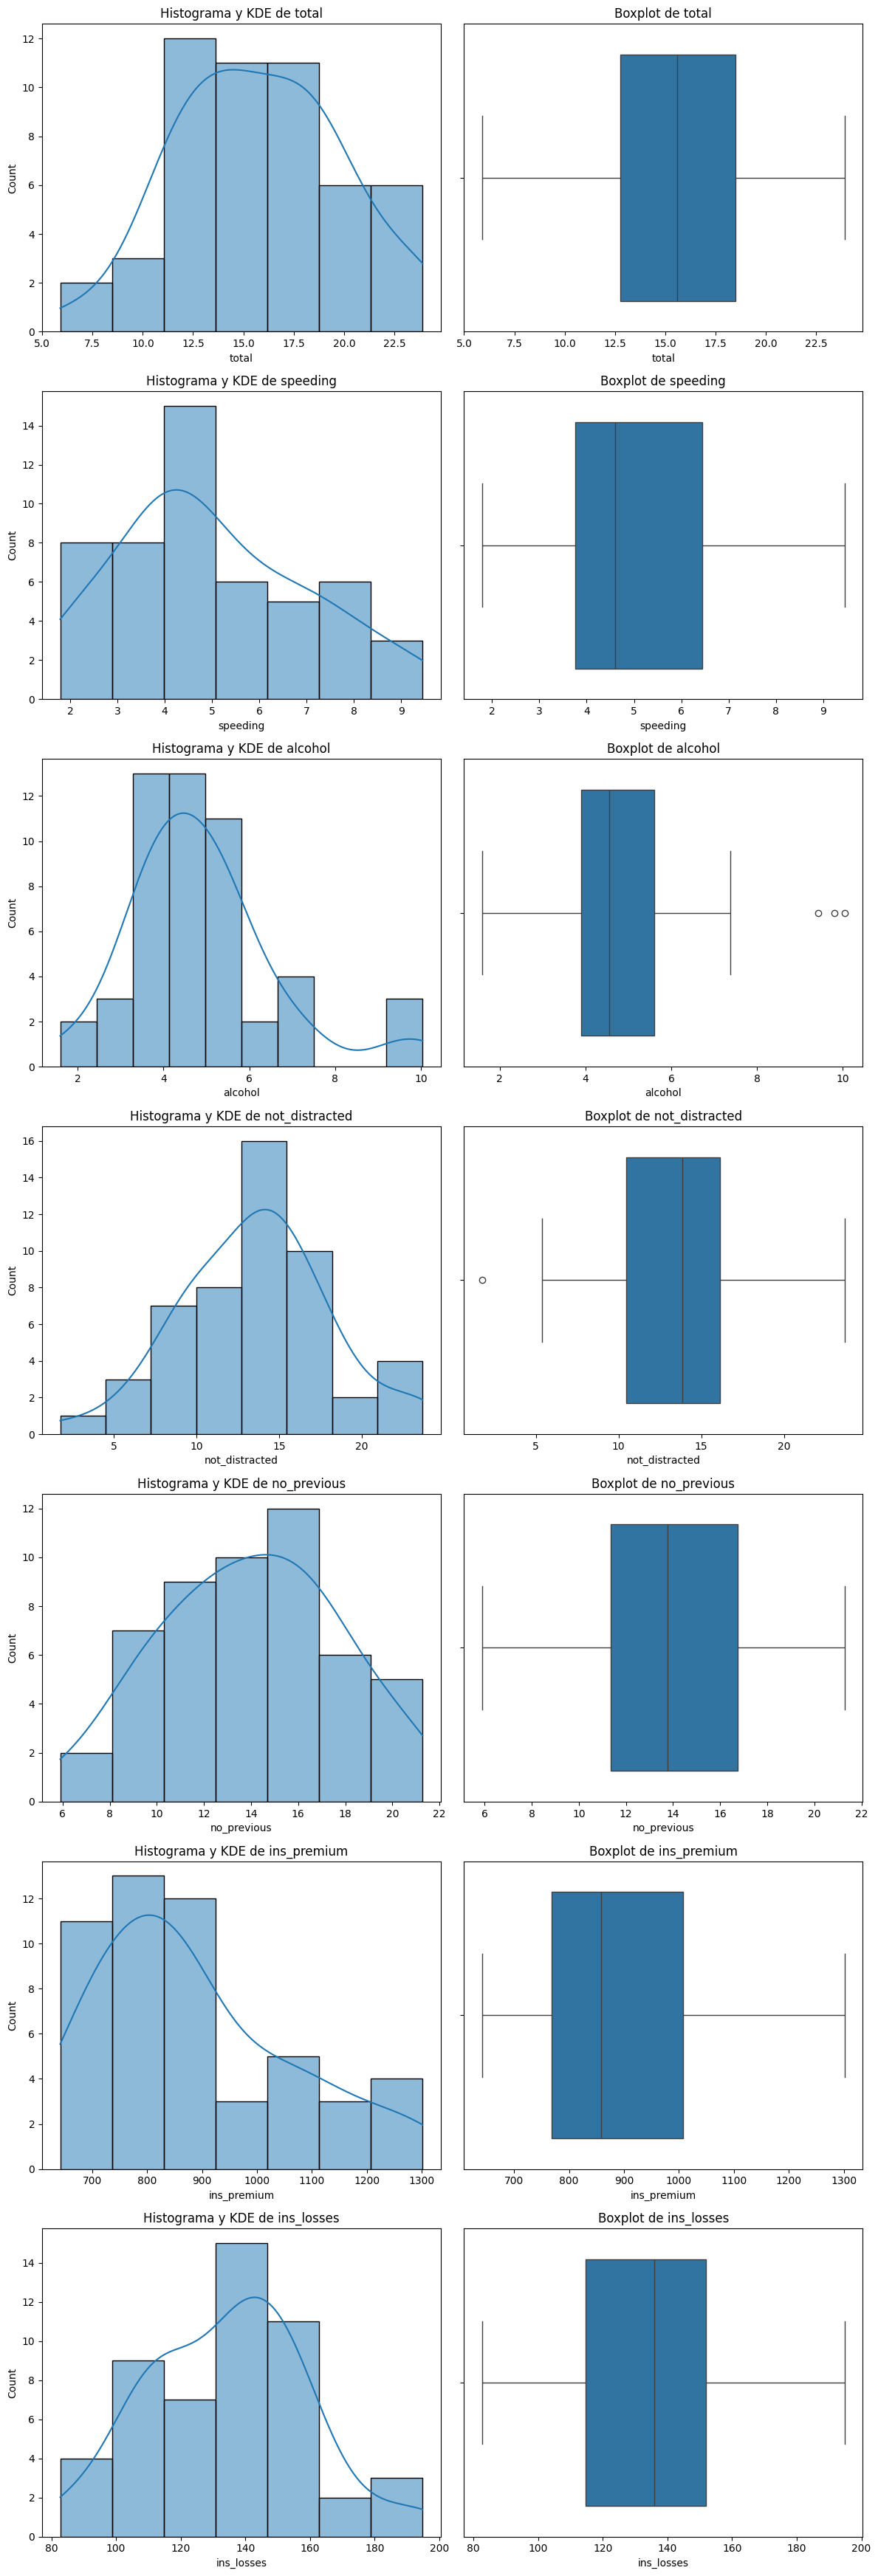

In [16]:
plot_combined_graphs(df_cars,["total","speeding","alcohol","not_distracted","no_previous","ins_premium","ins_losses"])

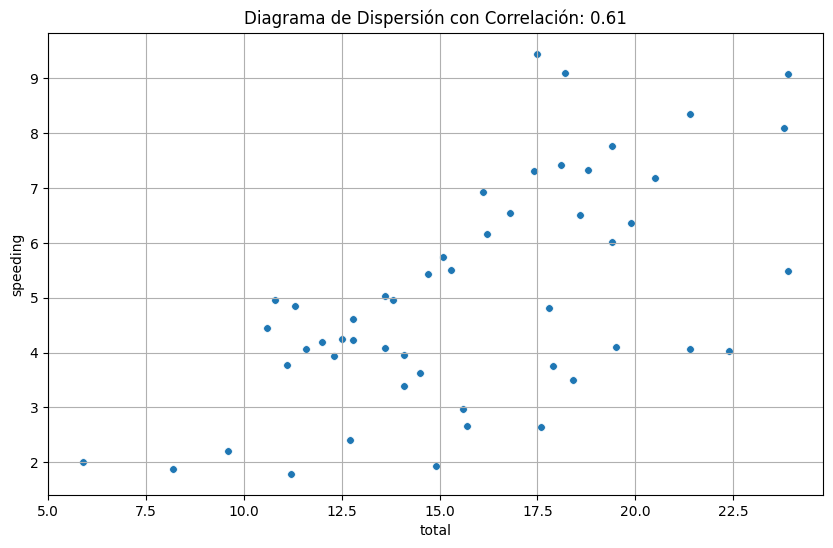

In [17]:
grafico_dispersion_con_correlacion(df_cars,"total", "speeding", mostrar_correlacion= True, tamano_puntos= 30)

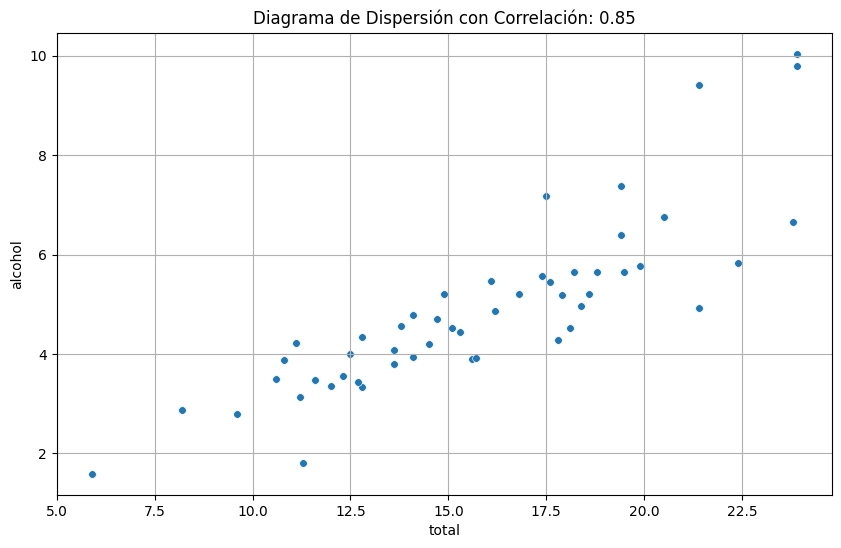

In [18]:
grafico_dispersion_con_correlacion(df_cars,"total", "alcohol", mostrar_correlacion= True, tamano_puntos= 30)

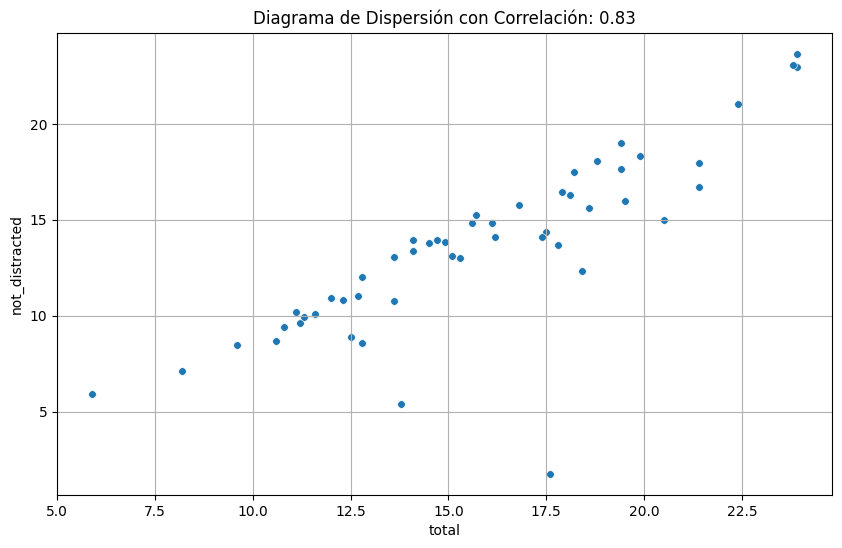

In [19]:
grafico_dispersion_con_correlacion(df_cars,"total", "not_distracted", mostrar_correlacion= True, tamano_puntos= 30)

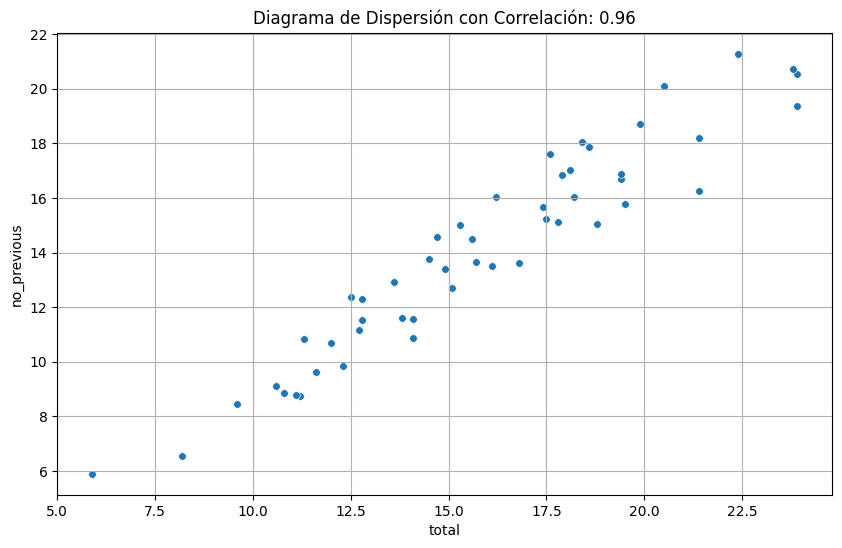

In [21]:
grafico_dispersion_con_correlacion(df_cars,"total", "no_previous", mostrar_correlacion= True, tamano_puntos= 30)

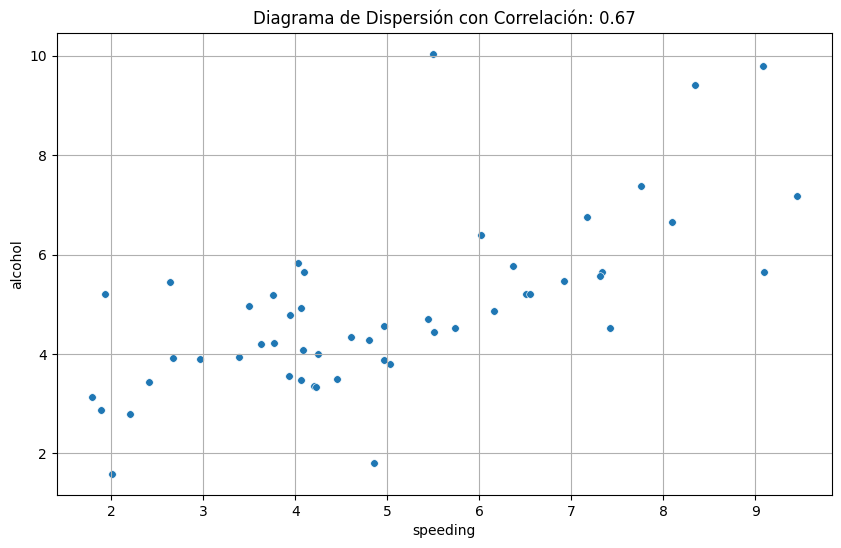

In [26]:
grafico_dispersion_con_correlacion(df_cars,"speeding", "alcohol", mostrar_correlacion= True, tamano_puntos= 30)

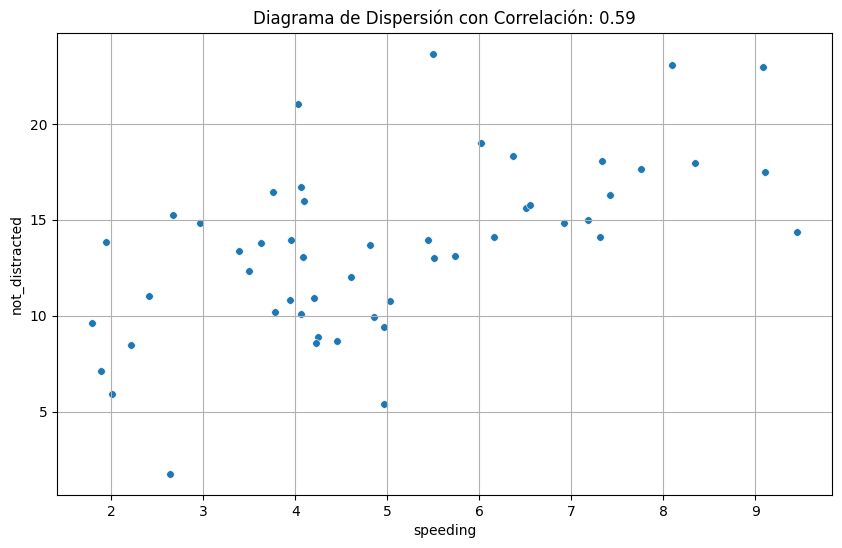

In [27]:
grafico_dispersion_con_correlacion(df_cars,"speeding", "not_distracted", mostrar_correlacion= True, tamano_puntos= 30)

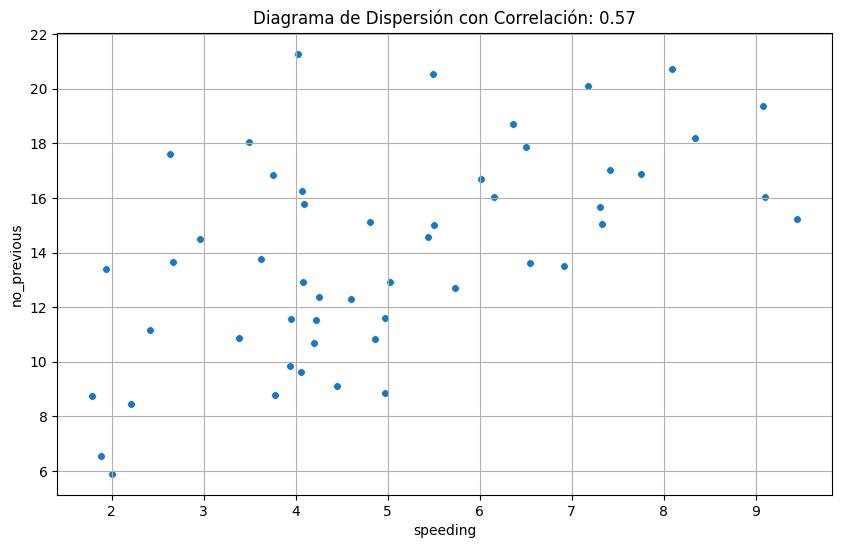

In [29]:
grafico_dispersion_con_correlacion(df_cars,"speeding", "no_previous", mostrar_correlacion= True, tamano_puntos= 30)

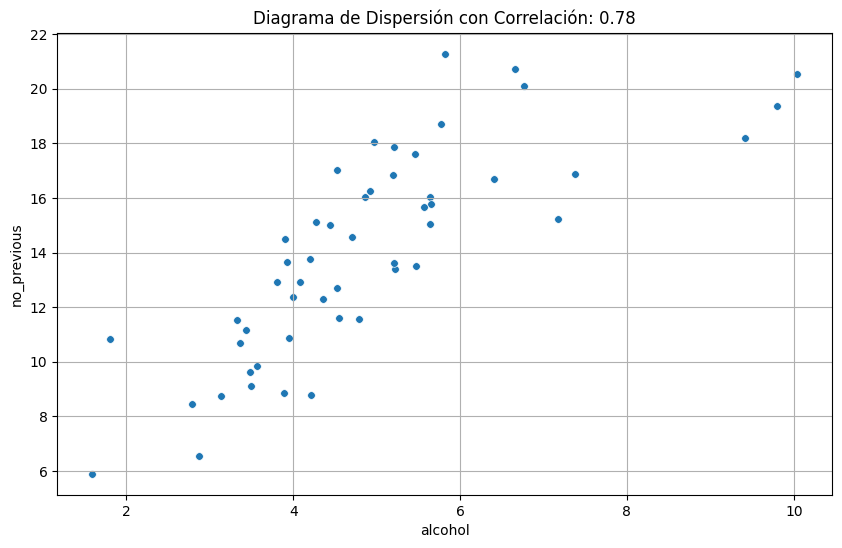

In [30]:
grafico_dispersion_con_correlacion(df_cars,"alcohol", "no_previous", mostrar_correlacion= True, tamano_puntos= 30)

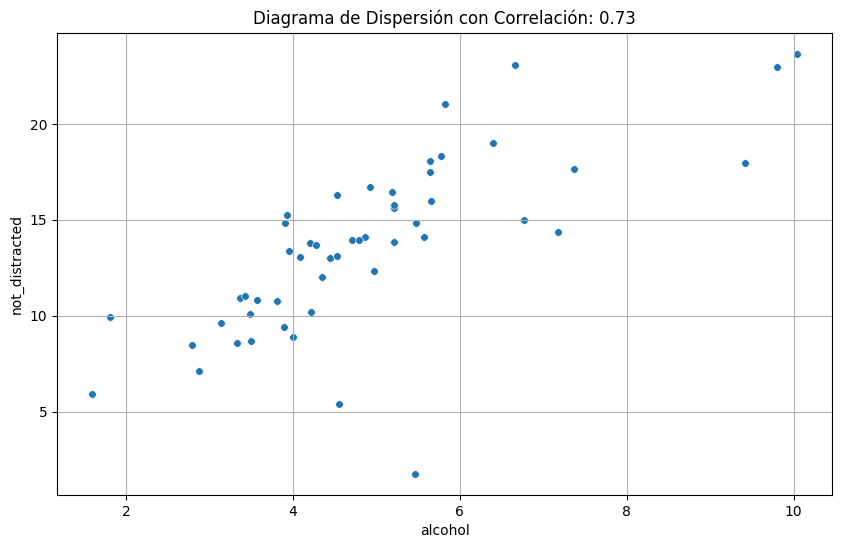

In [32]:
grafico_dispersion_con_correlacion(df_cars,"alcohol", "not_distracted", mostrar_correlacion= True, tamano_puntos= 30)

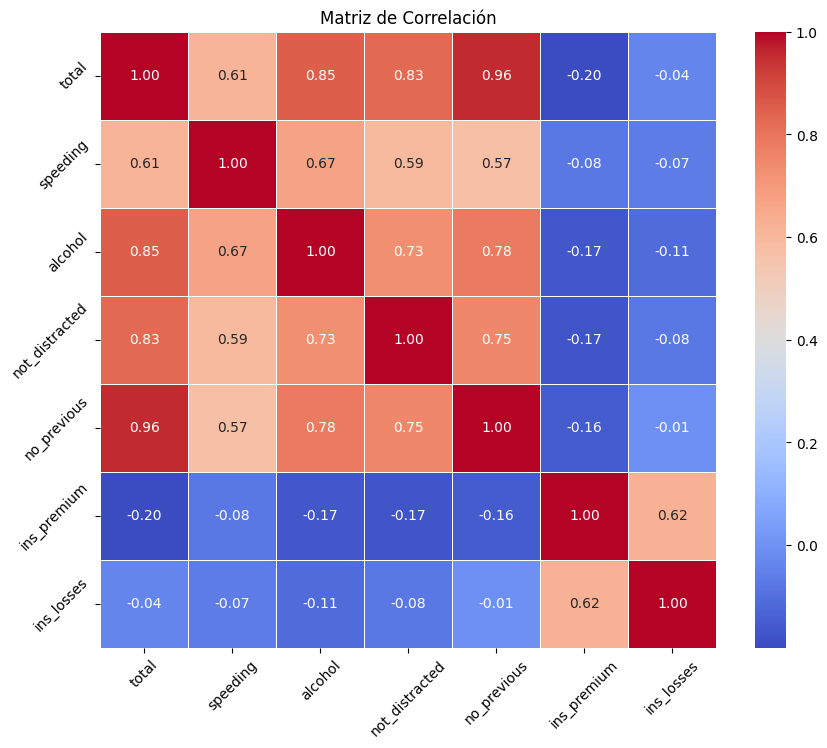

In [33]:
plt.figure(figsize=(10, 8))  # Ya lo veremos pero esto permite ajustar el tamaño de las gráficas
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5) # el cmap es el rango de colores usado para representar "el calor"

plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  # Rota las etiquetas de las x si es necesario
plt.yticks(rotation=45)  # Rota las etiquetas de las y si es necesario

plt.show()

In [34]:
df_solo_numeros = df_cars.select_dtypes(include = ["float","int"])
df_solo_numeros.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses'],
      dtype='object')

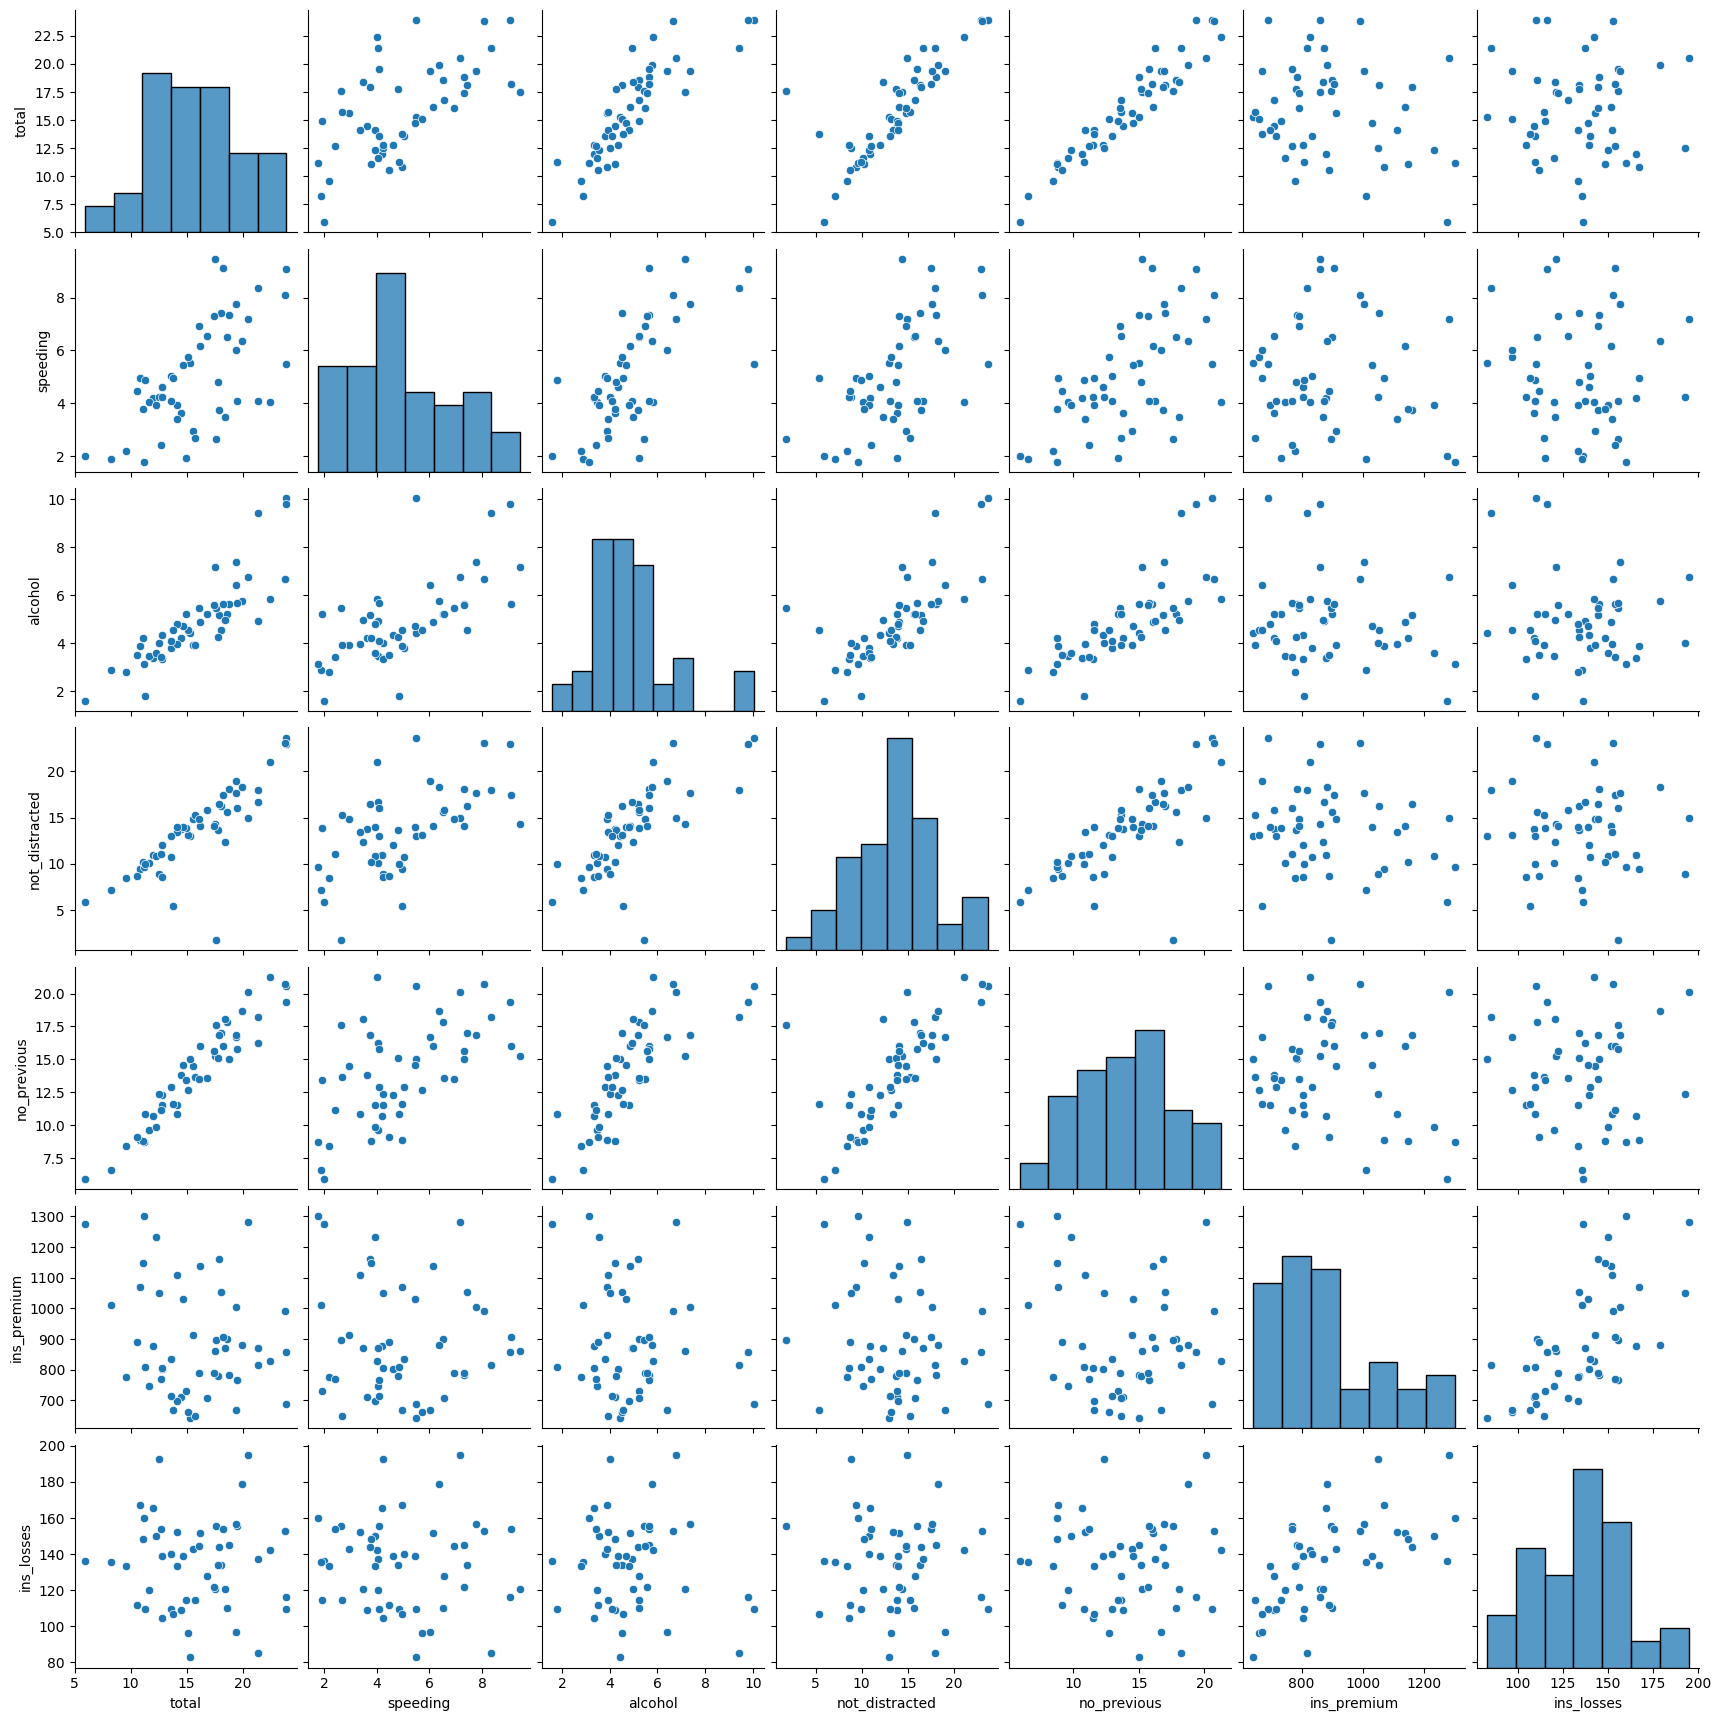

In [35]:
sns.pairplot(df_solo_numeros)
plt.show()

### Ejercicio 6

Realiza un análisis multivariante entre las variables numéricas "total", "alcohol", "speeding". ¿Puedes sacar alguna conclusión interesante?

In [36]:
df_multi = df_cars[["total","alcohol","speeding"]]
df_multi.columns

Index(['total', 'alcohol', 'speeding'], dtype='object')

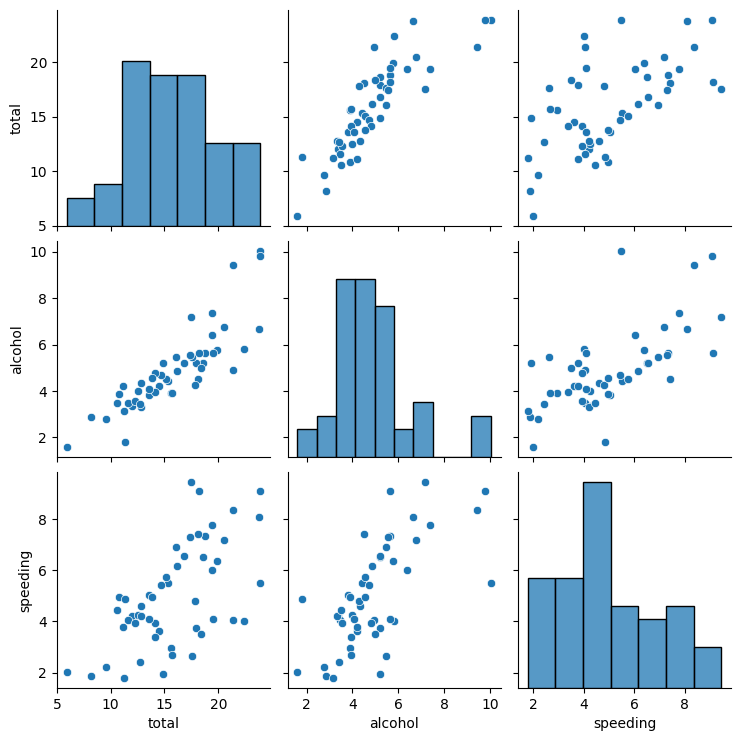

In [37]:
sns.pairplot(df_multi)
plt.show()

* The analysis demomstrates that there is a strong relationship between the three variables. This correlation is probably due to the fact, that the number of accidents by alcohol or speeding increase with the total number of accidents.
* There is also a strong correlation between alcohol and speeding, showing that many accidents caused by speeding are also caused by alcohol consumption.
* The correlation between alcohol and total is stronger than that of speeding and total. Therefore we can deduce that total accidents are more directly correlated to alcohol than to speeding, however as there is quite a strong correlation between speeding and total and an even stronger correlation between alcohol and speeding, I would say that speeding is an underlying factor of the correlation between alcohol and total.